In [1]:
import pandas as pd

In [2]:
import numpy as np 


In [3]:
import sklearn

In [4]:
dataset = pd.read_csv('Tweets.csv')

In [5]:
dataset.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
dataset.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [8]:
# check number of positiuve and negetive tweets  

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [10]:
tweet_analysis = dataset.copy()

In [11]:
tweet_analysis['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

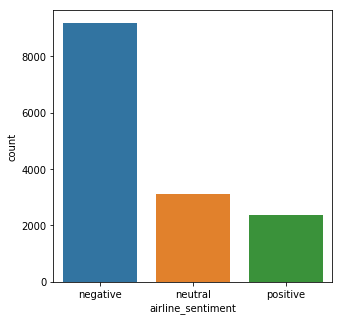

In [12]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='airline_sentiment',data=tweet_analysis,order=tweet_analysis.airline_sentiment.value_counts().index)
plt.show()

In [13]:
tweet_analysis['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

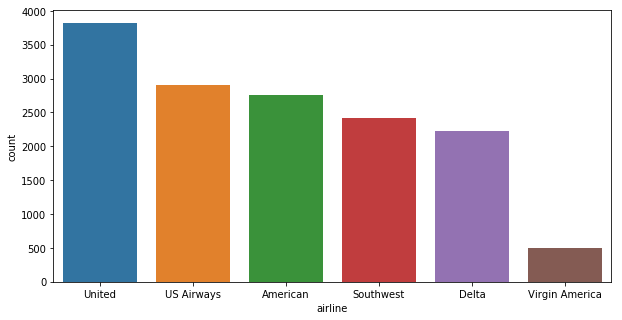

In [14]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='airline',data=tweet_analysis,order=tweet_analysis.airline.value_counts().index)
plt.show()

In [15]:
# lets check which airlines has most negetive comments 


In [16]:
neg_comments = dataset.copy()

In [17]:
neg_comment = neg_comments[neg_comments['airline_sentiment'] == 'negative']['airline']

In [18]:
neg_comment = neg_comment.value_counts().rename_axis('AIrline Names').reset_index(name='counts')

In [19]:
neg_comment

,AIrline Names,counts
0,United,2633
1,US Airways,2263
2,American,1960
3,Southwest,1186
4,Delta,955
5,Virgin America,181


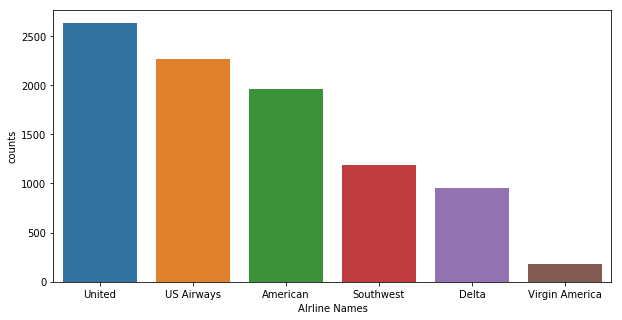

In [20]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='AIrline Names',y='counts',data=neg_comment)
plt.show()

In [21]:
# lets see percentage of negative comments 

In [22]:
neg_comment['TotalComments'] = np.zeros(len(neg_comment['AIrline Names']))
neg_comment['Percentage_Negative_comments'] = np.zeros(len(neg_comment['AIrline Names']))

In [23]:
neg_comment['TotalComments'] = tweet_analysis['airline'].value_counts().values

In [24]:
neg_comment['Percentage_Negative_comments']  = 100*neg_comment.counts/neg_comment.TotalComments

In [25]:
neg_comment

,AIrline Names,counts,TotalComments,Percentage_Negative_comments
0,United,2633,3822,68.890633
1,US Airways,2263,2913,77.686234
2,American,1960,2759,71.040232
3,Southwest,1186,2420,49.008264
4,Delta,955,2222,42.979298
5,Virgin America,181,504,35.912698


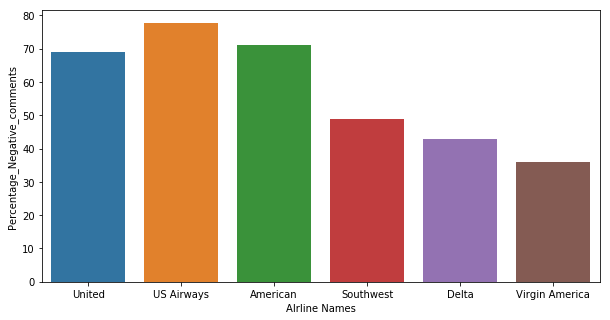

In [26]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='AIrline Names',y='Percentage_Negative_comments',data=neg_comment)
plt.show()

In [27]:
#Highest complaints are from US Airways .


In [28]:
#reasons for most complaints ? 

In [29]:
neg_reasons = dataset.copy()

In [30]:
neg_reasons = neg_reasons.dropna(subset=['negativereason'])

In [31]:
neg_reasons.negativereason.nunique()

10

In [32]:
# Lets create a Facet Grid to see the reasons of complains of various airlines 

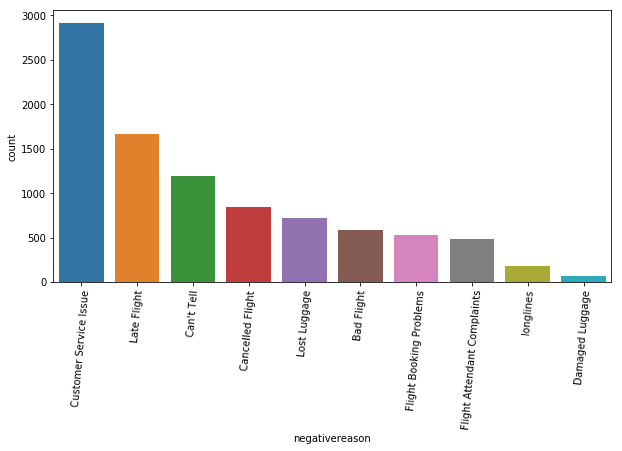

In [33]:
plt.figure(figsize=(10,5))
#g = sns.FacetGrid(neg_reasons, hue='airline')
#g =g.map(g.countplot())
sns.countplot(x='negativereason',data=neg_reasons,order=neg_reasons.negativereason.value_counts().index)
plt.xticks(fontsize=10,rotation=85)
plt.show()

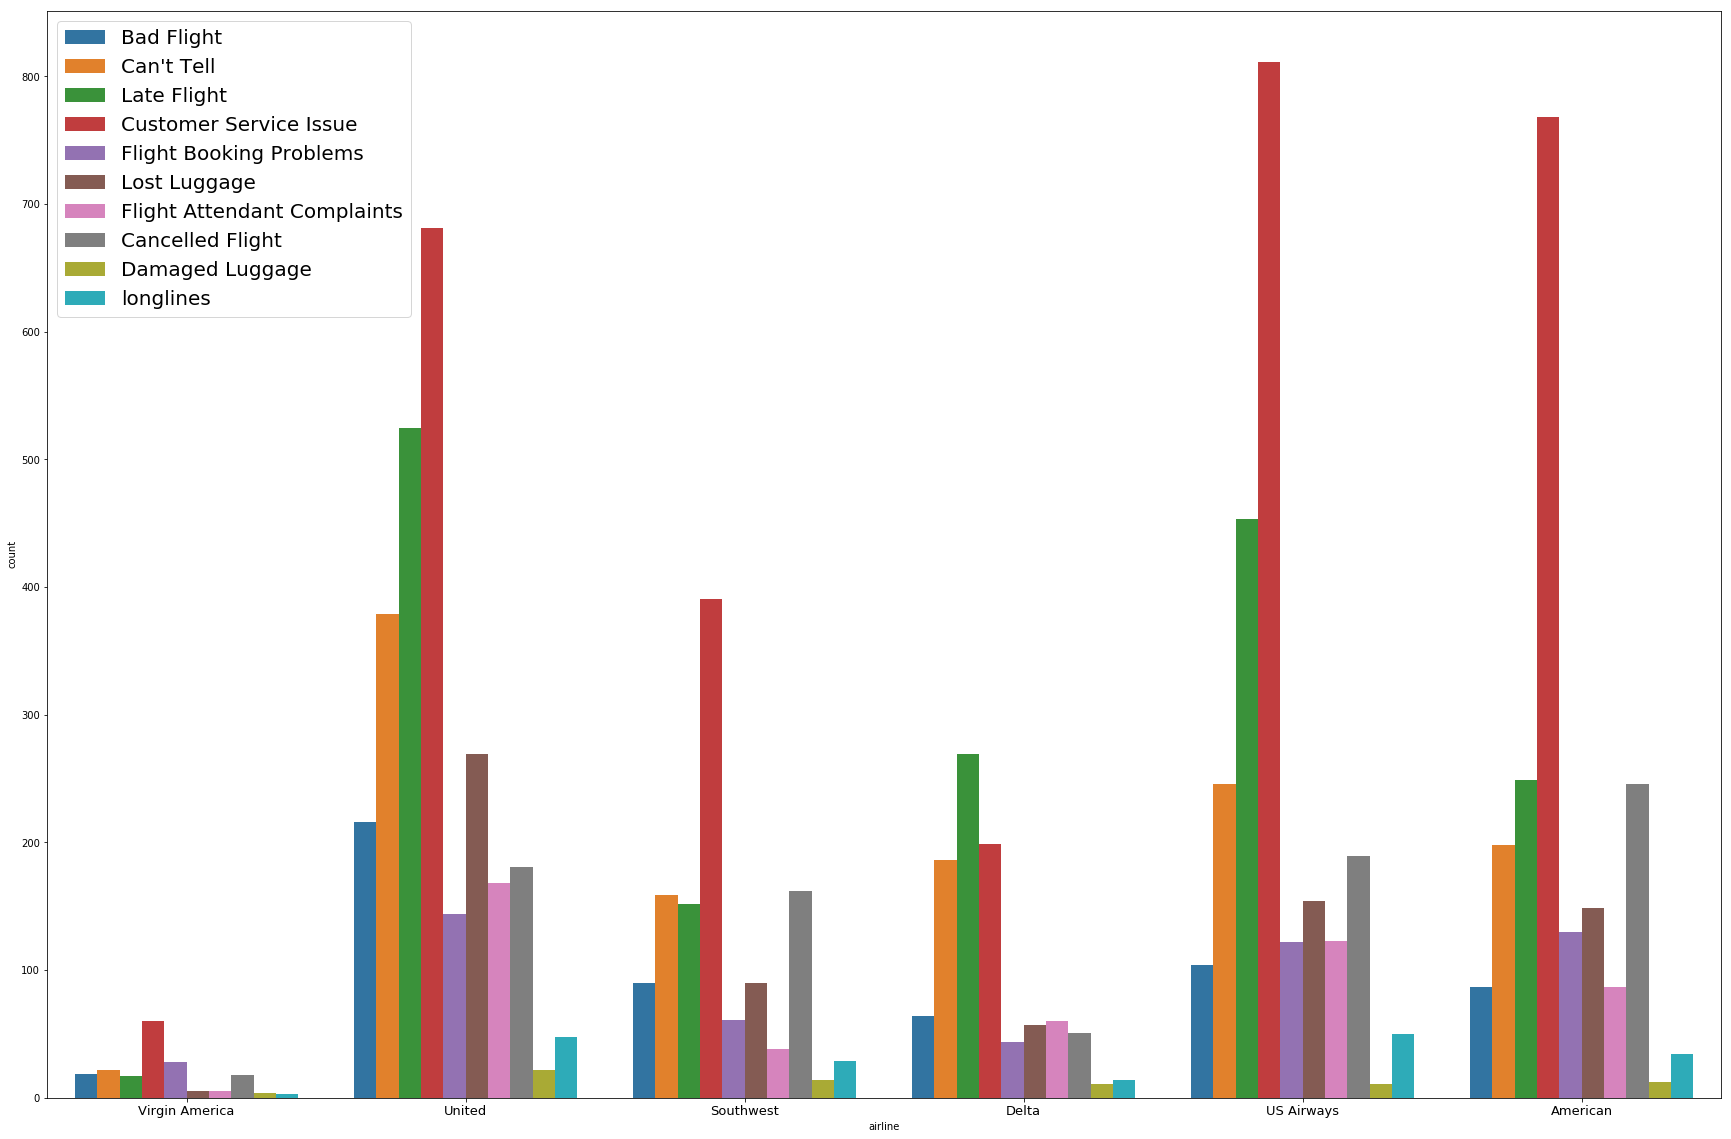

In [34]:
plt.figure(figsize=(30,20))
#g = sns.FacetGrid(neg_reasons, hue='airline')
#g =g.map(g.countplot())
sns.countplot(x='airline',hue='negativereason',data=neg_reasons)
plt.xticks(fontsize=13)
plt.legend(loc='upper left', fontsize=20)
plt.show()


In [35]:
# Lets dig deep into tweets about Customer Service issues  

In [36]:
import re 

In [37]:
cust_ser_tweets = dataset.copy()

In [38]:
cust_ser_tweets = cust_ser_tweets[cust_ser_tweets['negativereason'] == 'Customer Service Issue']['text']

In [39]:
cust_ser_tweets = cust_ser_tweets.apply(lambda x: re.sub(r'(@\w+)','',x) , [x.split() for x in cust_ser_tweets])


In [40]:
from nltk import word_tokenize


In [41]:
# Lets remove punctuation from the text 

In [42]:
cust_ser_tweets= cust_ser_tweets.apply(lambda x: re.sub(r'[^\w\s]','',x))


In [43]:
# Lets remove non words 


In [44]:
cust_ser_tweets= cust_ser_tweets.apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))


In [45]:
cust_ser_tweets.head(10)

24     you guys messed up my seating I reserved seat...
25     status match program  I applied and its been ...
32     help left expensive headphones on flight  IAD...
33     awaiting my return phone call just would pref...
39     Your chat support is not working on your site...
61     I called a  weeks ago about adding  flights f...
66     heyyyy guyyyys been trying to get through for...
78     what is going on with customer service Is the...
80     why cant you supp the biz traveler like   and...
95     Is it me or is your website down  BTW your ne...
Name: text, dtype: object

In [46]:
import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords


In [47]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_stopwords(word_complain):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in word_complain:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [48]:
def normalize(words):
    words = to_lowercase(words)
    words = remove_stopwords(words)
    words = stem_words(words)
    words = lemmatize_verbs(words)

    return words

In [49]:
words = [word_tokenize(sample) for sample in cust_ser_tweets ]


In [50]:
cust_ser_tweets = list(cust_ser_tweets)

for x in range(0,len(words)):
    words[x] = normalize(words[x])


In [51]:
len(words)

2910

In [52]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [53]:
final_data  = " ".join([" ".join(data) for data in words])

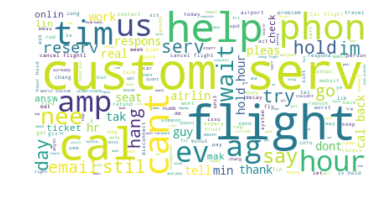

In [54]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords ,background_color="white").generate(final_data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
# Lets look for late flight issues 

In [56]:
late_flight_tweets = dataset.copy()

In [57]:
late_flight_tweets = late_flight_tweets[late_flight_tweets['negativereason'] == 'Late Flight']['text']

In [58]:
late_flight_tweets = late_flight_tweets.apply(lambda x: re.sub(r'(@\w+)','',x) , [x.split() for x in late_flight_tweets])


In [59]:
late_flight_tweets= late_flight_tweets.apply(lambda x: re.sub(r'[^\w\s]','',x))

In [60]:
late_flight_tweets= late_flight_tweets.apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

In [61]:
late_flight_tweets = list(late_flight_tweets)

In [62]:
word_complain = [word_tokenize(sample) for sample in late_flight_tweets ]


In [69]:
from nltk.corpus import stopwords

for x in range(0,len(word_complain)):
    word_complain[x] = normalize(word_complain[x])


In [70]:
final_data  = " ".join([" ".join(data) for data in word_complain])

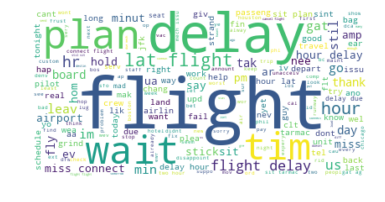

In [71]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords ,background_color="white").generate(final_data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [72]:
# Lets train n test the models we are goin to build 


In [73]:
sentiment_analysis = dataset.copy()

In [74]:
sentiment_analysis = sentiment_analysis[['text','airline_sentiment']]
sentiment_analysis = sentiment_analysis.dropna(subset=['text','airline_sentiment'])

In [75]:
sentiment_analysis['text'] = sentiment_analysis['text'].apply(lambda x: re.sub(r'(@\w+)','',x) , [x.split() for x in sentiment_analysis['text']])
sentiment_analysis['text'] = sentiment_analysis['text'].apply(lambda x: re.sub(r'(http:\/\/\w+\.\w+)',' ',x) , [x.split() for x in sentiment_analysis['text']])
sentiment_analysis['text'] = sentiment_analysis['text'].apply(lambda x: re.sub(r'(https:\/\/\w+\.\w+)',' ',x) , [x.split() for x in sentiment_analysis['text']])
sentiment_analysis['text'] = sentiment_analysis['text'].apply(lambda x: re.sub("[^a-zA-Z]", " ",x))


In [76]:
sentiment_analysis['text'] = list(sentiment_analysis['text'])

In [77]:
sentiment_new = [word_tokenize(sample) for sample in sentiment_analysis['text'] ]


In [86]:
from nltk.corpus import stopwords


for x in range(0,len(sentiment_new)):
    sentiment_new[x] = normalize(sentiment_new[x])

In [87]:
sentiment = []

for x in sentiment_new:
    sentiment.append(" ".join(x))
    
        

In [88]:
sentiment_analysis['new_text'] = sentiment

In [91]:
sentiment_analysis.head(10)

,airline_sentiment,new_text
0,neutral,say
1,positive,plu ad commerc expery tacky
2,neutral,today must mean nee tak ano trip
3,negative,real aggress blast obnoxy entertain guest fac ...
4,negative,real big bad thing
5,negative,sery would pay flight seat play real bad thing...
6,positive,ye near every tim fly vx ear worm go away
7,neutral,real miss prim opportun men without hat parody...
8,positive,wel
9,positive,amaz ar hour ear good


In [92]:
sentiment_analysis.airline_sentiment = sentiment_analysis.airline_sentiment.map({'neutral':0,'positive':1,'negative':-1})

In [93]:
sentiment_analysis.head(10)

,airline_sentiment,new_text
0,0,say
1,1,plu ad commerc expery tacky
2,0,today must mean nee tak ano trip
3,-1,real aggress blast obnoxy entertain guest fac ...
4,-1,real big bad thing
5,-1,sery would pay flight seat play real bad thing...
6,1,ye near every tim fly vx ear worm go away
7,0,real miss prim opportun men without hat parody...
8,1,wel
9,1,amaz ar hour ear good


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X,y = train_test_split(sentiment_analysis,test_size=0.2,random_state=42)


In [96]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")


In [97]:
train_features= v.fit_transform(X['new_text'])
test_features=v.transform(y['new_text'])

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [99]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [100]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]

for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,X['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,X['airline_sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,y['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    

/Users/omkar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of LogisticRegressionis 0.6451502732240437
Accuracy of KNeighborsClassifieris 0.5864071038251366


/Users/omkar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVCis 0.6451502732240437
Accuracy of DecisionTreeClassifieris 0.7025273224043715
Accuracy of RandomForestClassifieris 0.7715163934426229
Accuracy of AdaBoostClassifieris 0.7281420765027322
Accuracy of GaussianNBis 0.367827868852459


In [101]:
sentiment_analysis['airline_sentiment'].value_counts()

-1    9178
 0    3099
 1    2363
Name: airline_sentiment, dtype: int64

Text(0.5, 1.0, 'Accuracies of Models')

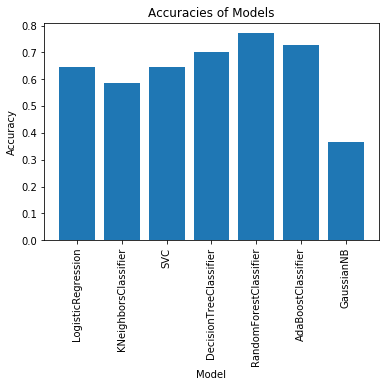

In [102]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

In [103]:
from keras.layers import Embedding
from keras.preprocessing import sequence 
from keras.preprocessing.text import Tokenizer


Using TensorFlow backend.


In [104]:
sentiment_nn = dataset.copy()

sentiment_nn['text'] = sentiment_nn['text'].apply(lambda x: re.sub(r'(@\w+)','',x) , [x.split() for x in sentiment_nn['text']])
sentiment_nn['text'] = sentiment_nn['text'].apply(lambda x: re.sub(r'(http:\/\/\w+\.\w+)',' ',x) , [x.split() for x in sentiment_nn['text']])
sentiment_nn['text'] = sentiment_nn['text'].apply(lambda x: re.sub(r'(https:\/\/\w+\.\w+)',' ',x) , [x.split() for x in sentiment_nn['text']])
sentiment_nn['text'] = sentiment_nn['text'].apply(lambda x: re.sub("[^a-zA-Z]", " ",x))


In [105]:
sentiment_nn['text'].map(len).max()

176

In [106]:
MAX_SEQUENCE_LENGTH = 176
MAX_NB_WORDS = 50000
EMBEDDING_DIM = 100


In [107]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentiment_nn['text'])



In [108]:
X = tokenizer.texts_to_sequences(sentiment_nn['text'].values)
y = sentiment_nn['airline_sentiment']

In [109]:
sentiment_nn['airline_sentiment'].head(5)

0     neutral
1    positive
2     neutral
3    negative
4    negative
Name: airline_sentiment, dtype: object

In [110]:
y[:5]

0     neutral
1    positive
2     neutral
3    negative
4    negative
Name: airline_sentiment, dtype: object

In [111]:
X = sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)


In [112]:
X.shape

(14640, 176)

In [113]:
Y = pd.get_dummies(sentiment_nn['airline_sentiment']).values

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42)

In [115]:
# create a embedding

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM , SpatialDropout1D

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


epochs = 4
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 9882 samples, validate on 1098 samples
Epoch 1/4
9882/9882 [==============================] - 67s 7ms/step - loss: 0.7592 - acc: 0.6823 - val_loss: 0.6281 - val_acc: 0.7477
Epoch 2/4
9882/9882 [==============================] - 73s 7ms/step - loss: 0.5084 - acc: 0.8004 - val_loss: 0.5248 - val_acc: 0.7951
Epoch 3/4
9882/9882 [==============================] - 63s 6ms/step - loss: 0.3576 - acc: 0.8660 - val_loss: 0.5443 - val_acc: 0.7951
Epoch 4/4
9882/9882 [==============================] - 64s 6ms/step - loss: 0.2707 - acc: 0.9018 - val_loss: 0.5712 - val_acc: 0.7842


In [123]:
# testing on new data 

new_review = [['how to get in touch ?'],['helpful crew'],['had a good time'],['Could have been better '],['bad experience']]


for data in new_review:
    seq = tokenizer.texts_to_sequences(data)
    padded = sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)

    labels = ['negative review','neutral review','positive review']
    print(pred,labels[np.argmax(pred)])




[[0.07504489 0.9109607  0.01399439]] neutral review
[[0.02916698 0.10588856 0.8649445 ]] positive review
[[0.24491112 0.33851314 0.41657573]] positive review
[[0.45222378 0.33675343 0.21102282]] negative review
[[0.6422494  0.20133603 0.15641457]] negative review


In [110]:
# saving the tokenizer on hdd 

import pickle

In [482]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [483]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")